# Week 5

# Getting Started with Pandas (Part 2)
# Data Analysis with Data Frames

In this week, we will look into a data set about movies and use data frames to perform data analysis.

## 1. Download and extract MovieLens data

- [MovieLens](https://grouplens.org/datasets/movielens/) is a web-based recommender system and virtual community that recommends movies for its users to watch, based on their file preferences using collaborative filtering of members' movie ratings and movie reviews. 
- We will look at its `ml-latest-small` dataset.

In [3]:
# Download ml-latest-small.zip from https://grouplens.org/datasets/movielens/
import os 
import urllib.request
url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"

file_path = "mydata/" # This is a relative path from the default folder
zip_file = "ml-latest-small.zip"

# Create the Data folder if it doesn't already exist.
if not os.path.exists(file_path):
    os.mkdir(file_path)

# Download file
urllib.request.urlretrieve(url, file_path + zip_file)

('mydata/ml-latest-small.zip', <http.client.HTTPMessage at 0x200eee03f10>)

In [4]:
# Decompress the zip file
import zipfile
f = zipfile.ZipFile(file_path + zip_file, "r")
f.printdir()
f.extractall(file_path)
f.close()

File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431


In [5]:
# Check that files has been unzipped
print(os.listdir(file_path + "ml-latest-small"))

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']


In [6]:
# Delete the zip file
os.remove(file_path + zip_file)

In [7]:
# Verify that the zip file is gone.
os.listdir(file_path)

['cereal.csv', 'ml-latest-small']

In [1]:
# Write a function to download and decompress file
import os
import urllib.request
import zipfile

def get_movielens(file_path, file_name, delete_zip_file=False):
    url = "http://files.grouplens.org/datasets/movielens/" + file_name
    if not os.path.exists(file_path):
        os.mkdir(file_path)
    if not os.path.exists(file_path + file_name):
        urllib.request.urlretrieve(url, file_path + file_name)
        print("File", file_name, "downloaded.")
    with zipfile.ZipFile(file_path + file_name, "r") as f:
        f.extractall(file_path)
        print("Files extracted:")
        print(f.printdir())
    if delete_zip_file:
        os.remove(file_path + file_name)

In [2]:
file_path = "mydata/"
zip_file = "ml-latest-small.zip"
get_movielens(file_path, zip_file)
# Remember file_path = "Data/" and zip_file = "ml-latest-small.zip"

Files extracted:
File Name                                             Modified             Size
ml-latest-small/                               2018-09-26 15:50:12            0
ml-latest-small/links.csv                      2018-09-26 15:50:10       197979
ml-latest-small/tags.csv                       2018-09-26 15:49:40       118660
ml-latest-small/ratings.csv                    2018-09-26 15:49:38      2483723
ml-latest-small/README.txt                     2018-09-26 15:50:12         8342
ml-latest-small/movies.csv                     2018-09-26 15:49:56       494431
None


## 2. Load ratings data as a pandas DataFrame
- Load csv file as a DataFrame
- head()
- shape, columns, dtypes
- indexing with loc[]
- Handle date and time data
- Data transformation with apply()

In [17]:
import pandas as pd

ratings_df = pd.read_csv("mydata/ml-latest-small/ratings.csv")
ratings_df.head(5) # Show the first several rows of the dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [20]:
# Ex: How many records are there?

print(ratings_df.shape)

(100836, 4)


In [21]:
# Ex: Display the types of each feature

ratings_df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

In [23]:
# Convert time stamp to a readable format
from datetime import datetime

# Example: convert the first time stamp
timestamp = ratings_df.loc[0, "timestamp"]
print(timestamp)

dt = datetime.fromtimestamp(timestamp)
print(dt)

print(dt.year)
print(dt.month)

ratings_df.loc[0, "Year"] = dt.year
# ratings_df.loc[0, "Month"] = dt.month
# ratings_df.loc[0, "Day"] = dt.day
# ratings_df.loc[0, "Hour"] = dt.hour
# ratings_df.loc[0, "Minute"] = dt.minute
# ratings_df.loc[0, "Second"] = dt.second
ratings_df.head()

964982703
2000-07-30 14:45:03
2000
7


,userId,movieId,rating,timestamp,Year
0,1,1,4.0,964982703,2000.0
1,1,3,4.0,964981247,NaN
2,1,6,4.0,964982224,NaN
3,1,47,5.0,964983815,NaN
4,1,50,5.0,964982931,NaN


In [24]:
# Use apply() to apply a function to all rows
ratings_df["DT"] = ratings_df["timestamp"].apply(datetime.fromtimestamp)
ratings_df.head()

,userId,movieId,rating,timestamp,Year,DT
0,1,1,4.0,964982703,2000.0,2000-07-30 14:45:03
1,1,3,4.0,964981247,NaN,2000-07-30 14:20:47
2,1,6,4.0,964982224,NaN,2000-07-30 14:37:04
3,1,47,5.0,964983815,NaN,2000-07-30 15:03:35
4,1,50,5.0,964982931,NaN,2000-07-30 14:48:51


We can also create functions to fill column year, month, ...

In [25]:
# Ex: Fill the year column
def get_year(dt):
    return dt.year

ratings_df['Year'] = ratings_df['DT'].apply(get_year)
ratings_df.head()

,userId,movieId,rating,timestamp,Year,DT
0,1,1,4.0,964982703,2000,2000-07-30 14:45:03
1,1,3,4.0,964981247,2000,2000-07-30 14:20:47
2,1,6,4.0,964982224,2000,2000-07-30 14:37:04
3,1,47,5.0,964983815,2000,2000-07-30 15:03:35
4,1,50,5.0,964982931,2000,2000-07-30 14:48:51


Alternatively, we can use `pd.to_datetime()` for the conversion. [Link](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html)

In [29]:
# Ex: Use pd.to_datetime() to perform the conversion.

ratings_df['DT2'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
ratings_df.head()
# There is discrepency among the times. It is caused by different methods
# of generating timestamps.

,userId,movieId,rating,timestamp,Year,DT,DT2
0,1,1,4.0,964982703,2000,2000-07-30 14:45:03,2000-07-30 18:45:03+00:00
1,1,3,4.0,964981247,2000,2000-07-30 14:20:47,2000-07-30 18:20:47+00:00
2,1,6,4.0,964982224,2000,2000-07-30 14:37:04,2000-07-30 18:37:04+00:00
3,1,47,5.0,964983815,2000,2000-07-30 15:03:35,2000-07-30 19:03:35+00:00
4,1,50,5.0,964982931,2000,2000-07-30 14:48:51,2000-07-30 18:48:51+00:00


## 3. Save the processed ratings data

Data can be saved in many different formats. Today we will save the processed rating data as a new CSV file.

In [46]:
# Save the processed data as a .csv file
csv_file = "mydata/ml-latest-small/ratings_processed.csv"
ratings_df.to_csv(csv_file)

In [7]:
# Ex: Load the saved file and display its first 5 rows.
import pandas as pd
ratings_df = pd.read_csv("mydata/ml-latest-small/ratings_processed.csv",
                         index_col=[0])
ratings_df.head()

,userId,movieId,rating,timestamp,Year,DT,DT2
0,1,1,4.0,964982703,2000,2000-07-30 14:45:03,2000-07-30 18:45:03+00:00
1,1,3,4.0,964981247,2000,2000-07-30 14:20:47,2000-07-30 18:20:47+00:00
2,1,6,4.0,964982224,2000,2000-07-30 14:37:04,2000-07-30 18:37:04+00:00
3,1,47,5.0,964983815,2000,2000-07-30 15:03:35,2000-07-30 19:03:35+00:00
4,1,50,5.0,964982931,2000,2000-07-30 14:48:51,2000-07-30 18:48:51+00:00


## 4. Analyzing MovieLens Data
- Distribution of movie ratings
- Popular movies

In [8]:
# Use value_counts() to find the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts()
print(rating_frequencies)

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64


In [9]:
# Find sorted the rating frequencies
rating_frequencies = ratings_df['rating'].value_counts().sort_index(ascending=False)
print(rating_frequencies)

5.0    13211
4.5     8551
4.0    26818
3.5    13136
3.0    20047
2.5     5550
2.0     7551
1.5     1791
1.0     2811
0.5     1370
Name: rating, dtype: int64


<AxesSubplot:>

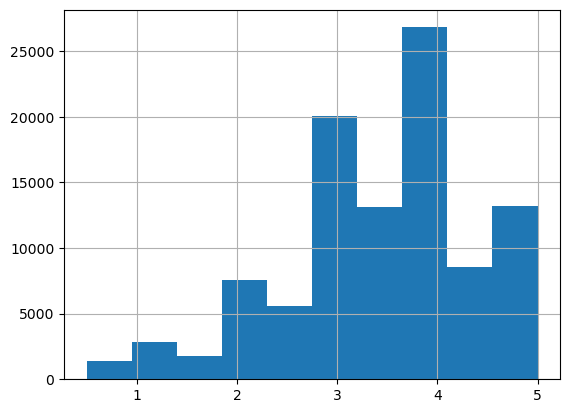

In [10]:
# Visualize rating frequencies as a histogram
ratings_df['rating'].hist()

In [14]:
# When were these ratings created?
import numpy as np

print("Earliest year of rating:", ratings_df['Year'].min())

print("Latest year of rating:", np.max(ratings_df['Year'])) # .max() also works

print("The entire set of years:\n", ratings_df['Year'].value_counts().sort_index())

Earliest year of rating: 1996
Latest year of rating: 2018
The entire set of years:
 1996     6040
1997     1916
1998      507
1999     2439
2000    10061
2001     3922
2002     3478
2003     4014
2004     3279
2005     5813
2006     4062
2007     7111
2008     4375
2009     4134
2010     2301
2011     1690
2012     4656
2013     1664
2014     1439
2015     6616
2016     6703
2017     8203
2018     6413
Name: Year, dtype: int64


In [15]:
# How are rating frequencies distributed in 2018?

# Create a filter in two steps
filter_2018 = (ratings_df['Year'] == 2018)
# print(filter_2018)
ratings_2018 = ratings_df[filter_2018]
ratings_2018.head()

,userId,movieId,rating,timestamp,Year,DT,DT2
1839,18,913,4.0,1517525849,2018,2018-02-01 17:57:29,2018-02-01 22:57:29+00:00
1852,18,1193,4.5,1517686025,2018,2018-02-03 14:27:05,2018-02-03 19:27:05+00:00
1980,18,5120,4.5,1516054115,2018,2018-01-15 17:08:35,2018-01-15 22:08:35+00:00
2012,18,6787,4.0,1534020896,2018,2018-08-11 16:54:56,2018-08-11 20:54:56+00:00
2053,18,27878,4.5,1526159893,2018,2018-05-12 17:18:13,2018-05-12 21:18:13+00:00


In [16]:
# Create a filter in one step:
ratings_2018 = ratings_df[ratings_df['Year'] == 2018]
ratings_2018.head()

,userId,movieId,rating,timestamp,Year,DT,DT2
1839,18,913,4.0,1517525849,2018,2018-02-01 17:57:29,2018-02-01 22:57:29+00:00
1852,18,1193,4.5,1517686025,2018,2018-02-03 14:27:05,2018-02-03 19:27:05+00:00
1980,18,5120,4.5,1516054115,2018,2018-01-15 17:08:35,2018-01-15 22:08:35+00:00
2012,18,6787,4.0,1534020896,2018,2018-08-11 16:54:56,2018-08-11 20:54:56+00:00
2053,18,27878,4.5,1526159893,2018,2018-05-12 17:18:13,2018-05-12 21:18:13+00:00


<AxesSubplot:>

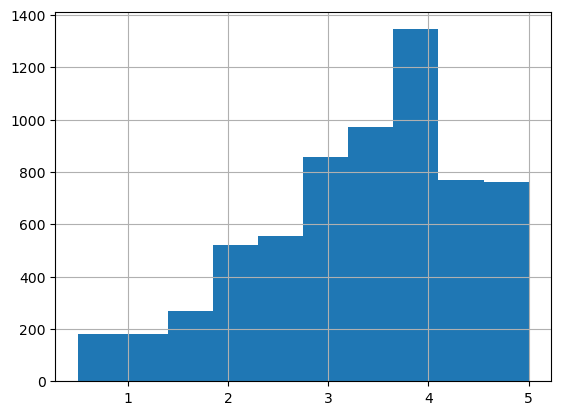

In [17]:
ratings_2018['rating'].hist()

<AxesSubplot:>

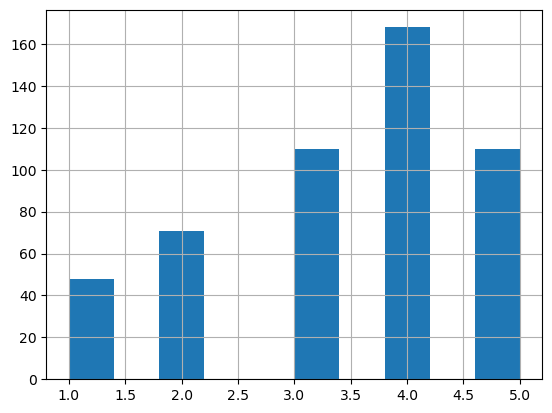

In [21]:
# Ex: How are rating frequencies distributed in 1998?

ratings_1998 = ratings_df[ratings_df['Year'] == 1998]
# ratings_1998['Year'].value_counts()
ratings_1998['rating'].hist()

<AxesSubplot:>

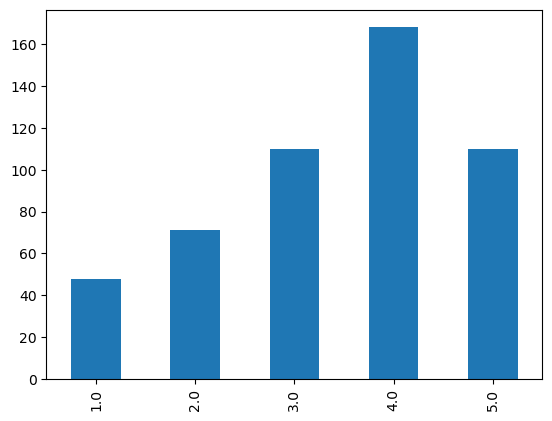

In [22]:
# To make the plot look nicer, let's create a bar plot on the frequencies
ratings_1998['rating'].value_counts().sort_index().plot.bar()

Next, let's identify some popular movies.

In [ ]:
ratings_df.head()

In [26]:
# Warm-up: Find out how many ratings are given to movie 913

# Step 1: Extract all records relevant to movie 913
movie913 = ratings_df[ratings_df['movieId'] == 913]
movie913.head()

# Step 2: Count the number of ratings
movie913.shape[0]

44

In [27]:
# Compute the number of ratings given to each movie.
ratings_df['movieId'].value_counts()

356       329
318       317
296       307
593       279
2571      278
         ... 
86279       1
86922       1
5962        1
87660       1
163981      1
Name: movieId, Length: 9724, dtype: int64

In [29]:
# Ex: Which movie received the highest number of ratings?

ratings_df['movieId'].value_counts()

356

In [ ]:
# Ex: Which movies received the largest number of 5.0s?




In [30]:
# What is the name of the movie? (The answer requires another data file.)

# Load movies.csv
movies_df = pd.read_csv('mydata/ml-latest-small/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [32]:
# Ex: Find out the title corresponding to the movies with high number of ratings.

movies_df[movies_df['movieId'] == 356]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [36]:
# Find out the names of top 5 most rated movies
ids = ratings_df['movieId'].value_counts().index[:5]
print("IDs for top 5 most rated movies:", list(ids))
movies_df[movies_df['movieId'].isin(ids)]

IDs for top 5 most rated movies: [356, 318, 296, 593, 2571]


,movieId,title,genres
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [49]:
# Which movie receives the most 5.0s?

# Step 1: Extract all 5.0 ratings
best_ratings = ratings_df[ratings_df['rating'] == 5.0]
# best_ratings.head()
# Step 2: Compute the frequences with respect to movieId
ids = best_ratings['movieId'].value_counts().index[0:10]
# print(ids)
# Step 3: Find the title of movies of interest
result = movies_df[movies_df['movieId'].isin(ids)].copy()
# result.loc[:, '# of 5.0 ratings'] = \
#     best_ratings['movieId'].value_counts().values[0:1]
result

,movieId,title,genres
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
461,527,Schindler's List (1993),Drama|War
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
659,858,"Godfather, The (1972)",Crime|Drama
898,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller


In [51]:
# Warm-up: Calculate the average rating of 2571: The Matrix.

# Step 1: Extract all ratings given to this movie
movie2571 = ratings_df[ratings_df['movieId'] == 2571]
# movie2571.head()
# Step 2: Use the mean() method to calculate the average rating
movie2571['rating'].mean()

4.192446043165468

In [60]:
# Which movie has the highest average rating?

for row_index in movies_df.index:
    idx = movies_df.loc[row_index, 'movieId']
#     print("Calculating for movie:", idx)
    movie_idx = ratings_df[ratings_df['movieId'] == idx]
    avg = movie_idx['rating'].mean()
    count = movie_idx.shape[0]
#     print("Average rating of this movie:", avg)
    # Append the average rating to the movies data frame
    movies_df.loc[row_index, 'Average Rating'] = avg
    movies_df.loc[row_index, 'Number of Ratings'] = count

In [61]:
movies_df.head()

,movieId,title,genres,Average Rating,Number of Ratings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


In [63]:
# Find the top ten highly-rated movies.
movies_of_interest = movies_df[movies_df['Number of Ratings'] > 100]
movies_of_interest.sort_values("Average Rating", ascending=False).head(10)

,movieId,title,genres,Average Rating,Number of Ratings
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.429022,317.0
659,858,"Godfather, The (1972)",Crime|Drama,4.289062,192.0
2226,2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.272936,218.0
922,1221,"Godfather: Part II, The (1974)",Crime|Drama,4.259690,129.0
6315,48516,"Departed, The (2006)",Crime|Drama|Thriller,4.252336,107.0
914,1213,Goodfellas (1990),Crime|Drama,4.250000,126.0
6710,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.238255,149.0
46,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,4.237745,204.0
899,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,4.232394,142.0
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.231076,251.0
